In [1]:
!pip install azure-ai-ml azure-identity pandas scikit-learn numpy matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np
from azure.ai.ml import MLClient, Input, Output
from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes
from azure.identity import DefaultAzureCredential
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import os
import json
from datetime import datetime

SUBSCRIPTION_ID = "3fc7fd13-533e-40a7-8e3d-f1fbf4204436"  # Replace with your subscription ID
RESOURCE_GROUP = "edu-demo"    # Replace with your resource group
WORKSPACE_NAME = "edu-demo"    # Replace with your workspace name

# For demo purposes, you can also use environment variables
SUBSCRIPTION_ID = os.getenv("AZURE_SUBSCRIPTION_ID", SUBSCRIPTION_ID)
RESOURCE_GROUP = os.getenv("AZURE_RESOURCE_GROUP", RESOURCE_GROUP)
WORKSPACE_NAME = os.getenv("AZURE_WORKSPACE_NAME", WORKSPACE_NAME)

print(f"Subscription ID: {SUBSCRIPTION_ID}")
print(f"Resource Group: {RESOURCE_GROUP}")
print(f"Workspace Name: {WORKSPACE_NAME}")

Subscription ID: 3fc7fd13-533e-40a7-8e3d-f1fbf4204436
Resource Group: edu-demo
Workspace Name: edu-demo


In [3]:
try:
    # Initialize Azure credentials
    credential = DefaultAzureCredential()
    
    # Create ML Client
    ml_client = MLClient(
        credential=credential,
        subscription_id=SUBSCRIPTION_ID,
        resource_group_name=RESOURCE_GROUP,
        workspace_name=WORKSPACE_NAME,
    )
    
    print("Azure ML Client initialized successfully!")
    print(f"Workspace: {ml_client.workspace_name}")
    
except Exception as e:
    print(f"Error initializing Azure ML Client: {e}")
    print("\nPlease ensure you have:")
    print("1. Azure CLI installed and logged in (az login)")
    print("2. Correct subscription, resource group, and workspace names")
    print("3. Appropriate permissions to access the workspace")

Azure ML Client initialized successfully!
Workspace: edu-demo


In [4]:
# Generate synthetic dataset
X, y = make_classification(
    n_samples=10000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=2,
    random_state=42
)

# Create feature names
feature_names = [f'feature_{i}' for i in range(X.shape[1])]

# Create DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print(f"Dataset shape: {df.shape}")
print(f"Target distribution:\n{df['target'].value_counts()}")
print("\nFirst few rows:")
df.head()

Dataset shape: (10000, 21)
Target distribution:
target
0    5010
1    4990
Name: count, dtype: int64

First few rows:


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
0,1.006691,0.405354,0.459728,-4.363860,-1.381650,-2.380556,-1.248945,0.517074,-0.061122,0.774127,...,1.659910,-0.715758,0.576815,0.313312,0.469709,-1.218856,1.362735,1.271885,-1.270045,1
1,3.203618,-0.707863,-0.159855,0.205699,-1.919808,0.756397,-1.333290,-0.279193,-3.010265,0.709751,...,1.638691,3.772126,-2.635292,1.036726,-2.824894,-5.352367,0.242236,3.272336,-12.615749,1
2,0.080839,-1.297337,5.958390,-12.574464,-0.226542,-2.381623,-3.105482,-5.083754,-1.982817,4.415567,...,-1.594456,1.421270,-1.460444,-3.143798,-2.745001,4.521133,-2.803548,1.314913,-16.043180,0
3,0.446512,0.652471,-3.803628,-4.147973,1.320190,0.845094,0.843244,-4.073604,2.357456,2.516031,...,-1.052972,0.277697,0.065564,-0.452179,-1.597238,1.404980,-0.968662,0.090072,-1.809187,0
4,-0.301284,-0.521775,-0.603533,-0.276637,0.923722,0.789961,0.163219,-2.097361,0.534197,-1.663811,...,-1.148814,1.161538,-0.332248,-2.210205,-0.525791,0.810874,-1.438882,-0.421273,-2.027759,0


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   10000 non-null  float64
 1   feature_1   10000 non-null  float64
 2   feature_2   10000 non-null  float64
 3   feature_3   10000 non-null  float64
 4   feature_4   10000 non-null  float64
 5   feature_5   10000 non-null  float64
 6   feature_6   10000 non-null  float64
 7   feature_7   10000 non-null  float64
 8   feature_8   10000 non-null  float64
 9   feature_9   10000 non-null  float64
 10  feature_10  10000 non-null  float64
 11  feature_11  10000 non-null  float64
 12  feature_12  10000 non-null  float64
 13  feature_13  10000 non-null  float64
 14  feature_14  10000 non-null  float64
 15  feature_15  10000 non-null  float64
 16  feature_16  10000 non-null  float64
 17  feature_17  10000 non-null  float64
 18  feature_18  10000 non-null  float64
 19  feature_19  

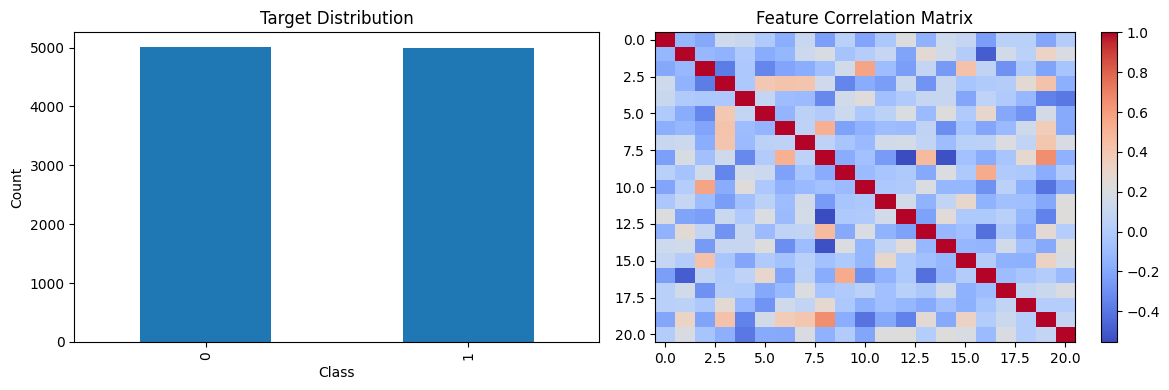

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics
print("Dataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())

# Plot target distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df['target'].value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
correlation_matrix = df.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.title('Feature Correlation Matrix')
plt.colorbar()

plt.tight_layout()
plt.show()

In [6]:
# Split the data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['target'])

print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")
print(f"\nTraining set target distribution:\n{train_df['target'].value_counts()}")
print(f"\nTest set target distribution:\n{test_df['target'].value_counts()}")

Training set shape: (8000, 21)
Test set shape: (2000, 21)

Training set target distribution:
target
0    4008
1    3992
Name: count, dtype: int64

Test set target distribution:
target
0    1002
1     998
Name: count, dtype: int64


In [7]:
# Create data directory
os.makedirs('./data', exist_ok=True)

# Save datasets
train_df.to_csv('./data/train_data.csv', index=False)
test_df.to_csv('./data/test_data.csv', index=False)
df.to_csv('./data/full_dataset.csv', index=False)

# Save metadata
metadata = {
    'dataset_name': 'synthetic_classification',
    'creation_date': datetime.now().isoformat(),
    'total_samples': len(df),
    'features': len(feature_names),
    'target_classes': df['target'].nunique(),
    'train_samples': len(train_df),
    'test_samples': len(test_df),
    'feature_names': feature_names
}

with open('./data/metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)

print("Data saved locally:")
print("- train_data.csv")
print("- test_data.csv")
print("- full_dataset.csv")
print("- metadata.json")

Data saved locally:
- train_data.csv
- test_data.csv
- full_dataset.csv
- metadata.json


In [8]:
try:
    # Create training data asset
    train_data = Data(
        path="./data/train_data.csv",
        type=AssetTypes.URI_FILE,
        description="Training data for synthetic classification",
        name="synthetic_train_data",
        version="1"
    )
    
    # Create test data asset
    test_data = Data(
        path="./data/test_data.csv",
        type=AssetTypes.URI_FILE,
        description="Test data for synthetic classification",
        name="synthetic_test_data",
        version="1"
    )
    
    # Upload data assets
    print("Uploading training data...")
    train_data_asset = ml_client.data.create_or_update(train_data)
    print(f"Training data uploaded: {train_data_asset.name}:{train_data_asset.version}")
    
    print("Uploading test data...")
    test_data_asset = ml_client.data.create_or_update(test_data)
    print(f"Test data uploaded: {test_data_asset.name}:{test_data_asset.version}")
    
    print("\nData assets created successfully in Azure ML!")
    
except Exception as e:
    print(f"Error uploading data: {e}")
    print("Continuing with local data for demo purposes...")

Uploading training data...


Uploading train_data.csv (< 1 MB): 100%|##########| 3.10M/3.10M [00:00<00:00, 13.5MB/s]




Training data uploaded: synthetic_train_data:1
Uploading test data...


Uploading test_data.csv (< 1 MB): 100%|##########| 775k/775k [00:00<00:00, 4.85MB/s]




Test data uploaded: synthetic_test_data:1

Data assets created successfully in Azure ML!
